# Ekstraksi Informasi dari Berita Kriminal Indonesia menggunakan Named Entity Recognition (NER).

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/hasil_scraping/detik_kriminalitas_all.csv')
df.head(10)

,url,judul,subjudul,tanggal,isi_berita,kanal
0,https://www.detik.com/sumbagsel/hukum-dan-krim...,4 Anak di Bawah Umur Tersangka Pembunuhan di P...,NaN,2024-09-05 20:30,Pelaku pembunuhan dan pemerkosaan AA (14) seor...,NaN
1,https://www.detik.com/sumut/berita/d-7526611/k...,Ketua Gerindra Sumut Puji Kapolda Tindak Tegas...,NaN,2024-09-05 18:55,"Ketua Gerindra Sumut, Ade Jona Prasetyo mengap...",NaN
2,https://www.detik.com/jatim/hukum-dan-kriminal...,26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...,NaN,2024-09-05 18:38,"Dalam waktu kurang lebih 3 bulan, Polres Probo...",NaN
3,https://travel.detik.com/international-destina...,"10 Fakta Vatikan, Negara Terkecil Dunia yang D...",NaN,2024-09-05 14:05,Paus Fransiskus yang tengah berada di Indonesi...,NaN
4,https://news.detik.com/berita/d-7525722/tingka...,"Tingkatkan Konektivitas, Pemkab Madiun Gagas S...",NaN,2024-09-05 13:02,Madiun adalah kabupaten yang terletak di Jawa ...,NaN
5,https://www.detik.com/jatim/hukum-dan-kriminal...,"Kriminalitas Surabaya Marak, Pengamat Sebut Pe...",NaN,2024-09-05 02:01,Sejumlah kejadian kriminalitas kian marak terj...,NaN
6,https://www.detik.com/bali/berita/d-7524971/pj...,Pj Gubernur Surati Pusat soal Moratorium Pemba...,NaN,2024-09-04 22:02,Penjabat (Pj) Gubernur Bali Sang Made Mahendra...,NaN
7,https://www.detik.com/sumut/hukum-dan-kriminal...,Pekerja Kafe Disiram Air Keras hingga Wajah 'B...,NaN,2024-09-04 21:40,"Seorang pekerja kafe di Cengkareng, MAS (32), ...",NaN
8,https://news.detik.com/pilkada/d-7523187/pramo...,Pramono Ingin Pasang CCTV di RT-RW Jakarta unt...,NaN,2024-09-04 02:44,Bakal Calon Gubernur Jakarta Pramono Anung ing...,NaN
9,https://www.detik.com/sumut/berita/d-7523073/p...,Pria Batam Nekat Jambret untuk Modal Judi Online,NaN,2024-09-03 22:21,Seorang pria berinisial RS (35) pelaku jambret...,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url         1480 non-null   object 
 1   judul       1480 non-null   object 
 2   subjudul    0 non-null      float64
 3   tanggal     1471 non-null   object 
 4   isi_berita  1480 non-null   object 
 5   kanal       0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 69.5+ KB


In [4]:
df.describe()

,subjudul,kanal
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [5]:
df.nunique()

url           1480
judul         1480
subjudul         0
tanggal       1466
isi_berita    1480
kanal            0
dtype: int64

## Filter Berita

In [6]:
df = df[df['url'].str.contains('/hukum-dan-kriminal/')]

In [7]:
df.reset_index(drop=True, inplace=True)
df

,url,judul,subjudul,tanggal,isi_berita,kanal
0,https://www.detik.com/sumbagsel/hukum-dan-krim...,4 Anak di Bawah Umur Tersangka Pembunuhan di P...,NaN,2024-09-05 20:30,Pelaku pembunuhan dan pemerkosaan AA (14) seor...,NaN
1,https://www.detik.com/jatim/hukum-dan-kriminal...,26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...,NaN,2024-09-05 18:38,"Dalam waktu kurang lebih 3 bulan, Polres Probo...",NaN
2,https://www.detik.com/jatim/hukum-dan-kriminal...,"Kriminalitas Surabaya Marak, Pengamat Sebut Pe...",NaN,2024-09-05 02:01,Sejumlah kejadian kriminalitas kian marak terj...,NaN
3,https://www.detik.com/sumut/hukum-dan-kriminal...,Pekerja Kafe Disiram Air Keras hingga Wajah 'B...,NaN,2024-09-04 21:40,"Seorang pekerja kafe di Cengkareng, MAS (32), ...",NaN
4,https://www.detik.com/sumut/hukum-dan-kriminal...,Hilang Nyawa Pria di Simalungun gegara Rebutan...,NaN,2024-09-03 09:03,Hanya gegara rebutan mikrofon untuk bernyanyi ...,NaN
...,...,...,...,...,...,...
631,https://www.detik.com/sumut/hukum-dan-kriminal...,"Curi Mobil Ambulans Puskesmas, 2 Pria di Simal...",NaN,2024-09-07 19:00,Dua pria di Simalungun ditangkap personel kepo...,NaN
632,https://www.detik.com/sumbagsel/hukum-dan-krim...,Polisi Sebut Pelaku Utama Pembunuh Siswi SMP d...,NaN,2024-09-07 18:00,Empat pelaku pembunuhan dan pemerkosaan siswi ...,NaN
633,https://www.detik.com/sumut/hukum-dan-kriminal...,Pria di Batam Kepergok Lecehkan Tetangga-Curi ...,NaN,2024-09-07 14:29,Seorang pria berinisial KP (19) warga Tiban Ba...,NaN
634,https://www.detik.com/jabar/hukum-dan-kriminal...,"Aksi 'Ninja' Curi 401 Kartu ATM Terekam CCTV, ...",NaN,2024-09-06 15:02,Sebanyak 401 lembar kartu ATM milik nasabah sa...,NaN


## Drop Fitur Subjudul dan Kanal

In [8]:
df = df.drop(columns=['subjudul', 'kanal'])

## Cek Duplikasi

In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {len(duplicate_rows)}")
duplicate_rows

Jumlah data duplikat: 0


,url,judul,tanggal,isi_berita


## Mengkonversi Fitur 'tanggal' ke format datetime

In [10]:
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   url         636 non-null    object        
 1   judul       636 non-null    object        
 2   tanggal     636 non-null    datetime64[ns]
 3   isi_berita  636 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.0+ KB


In [11]:
df.head(10)

,url,judul,tanggal,isi_berita
0,https://www.detik.com/sumbagsel/hukum-dan-krim...,4 Anak di Bawah Umur Tersangka Pembunuhan di P...,2024-09-05 20:30:00,Pelaku pembunuhan dan pemerkosaan AA (14) seor...
1,https://www.detik.com/jatim/hukum-dan-kriminal...,26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...,2024-09-05 18:38:00,"Dalam waktu kurang lebih 3 bulan, Polres Probo..."
2,https://www.detik.com/jatim/hukum-dan-kriminal...,"Kriminalitas Surabaya Marak, Pengamat Sebut Pe...",2024-09-05 02:01:00,Sejumlah kejadian kriminalitas kian marak terj...
3,https://www.detik.com/sumut/hukum-dan-kriminal...,Pekerja Kafe Disiram Air Keras hingga Wajah 'B...,2024-09-04 21:40:00,"Seorang pekerja kafe di Cengkareng, MAS (32), ..."
4,https://www.detik.com/sumut/hukum-dan-kriminal...,Hilang Nyawa Pria di Simalungun gegara Rebutan...,2024-09-03 09:03:00,Hanya gegara rebutan mikrofon untuk bernyanyi ...
5,https://www.detik.com/sumut/hukum-dan-kriminal...,Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...,2024-09-03 08:01:00,Hidup pria bernama Monika Hutauruk (45) harus ...
6,https://www.detik.com/sumut/hukum-dan-kriminal...,"Gegara Rebutan Mikrofon di Warung Tuak, Pria S...",2024-09-02 21:00:00,"Seorang pria di Kabupaten Simalungun, Sumatera..."
7,https://www.detik.com/sumut/hukum-dan-kriminal...,Polisi Tangkap Kawanan Pencuri Spesialis Bongk...,2024-09-01 19:00:00,Polisi menangkap empat orang pria kawanan penc...
8,https://www.detik.com/jabar/hukum-dan-kriminal...,"Anehnya Gani, Ngaku Dikejar Hantu hingga Tega ...",2024-09-01 15:31:00,"Fathurahman Al Gani, warga Kelurahan Tuguraja,..."
9,https://www.detik.com/sumut/hukum-dan-kriminal...,Mahasiswa PKL di Kantor Bawaslu Lampung Ditemb...,2024-08-31 12:30:00,Mahasiswa yang sedang melaksanakan PKL (pelati...


## Distribusi Panjang Berita

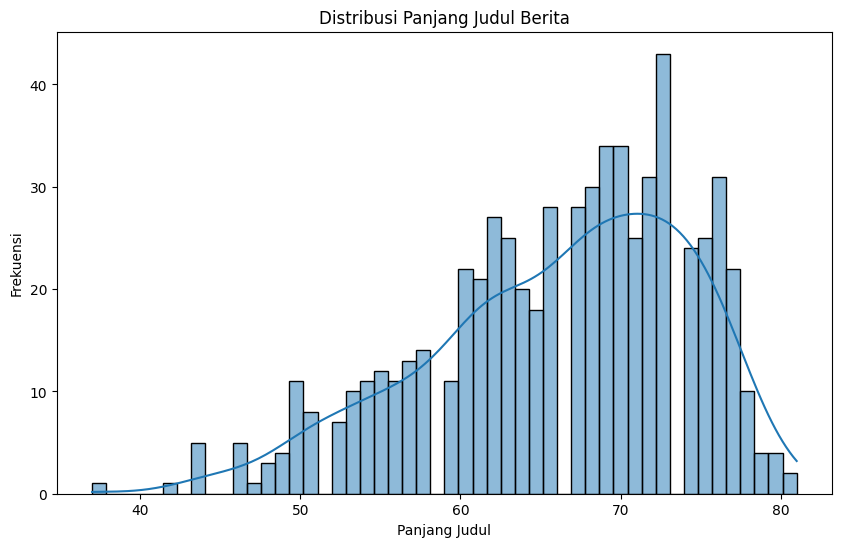

In [12]:
df['panjang_judul'] = df['judul'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_judul'], bins=50, kde=True)
plt.title('Distribusi Panjang Judul Berita')
plt.xlabel('Panjang Judul')
plt.ylabel('Frekuensi')
plt.show()

## Distribusi Panjang Isi Berita

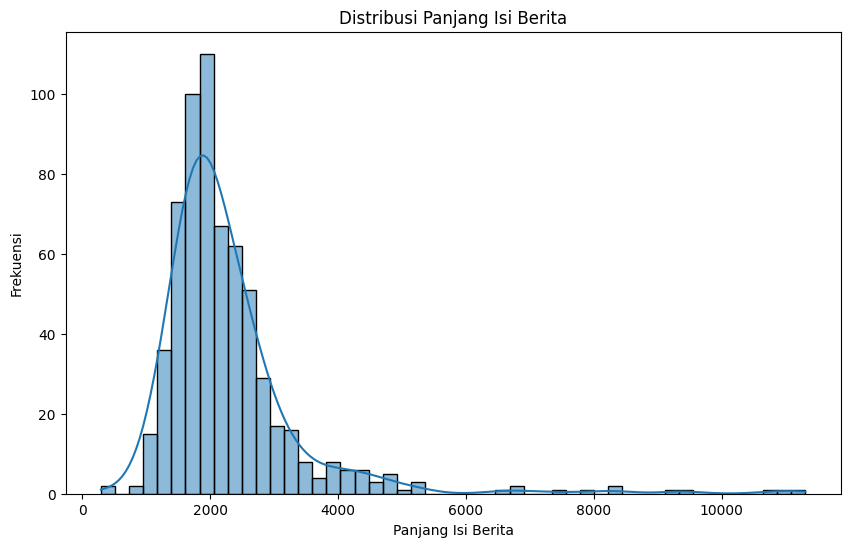

In [13]:
df['panjang_isi_berita'] = df['isi_berita'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_isi_berita'], bins=50, kde=True)
plt.title('Distribusi Panjang Isi Berita')
plt.xlabel('Panjang Isi Berita')
plt.ylabel('Frekuensi')
plt.show()

## Tren Jumlah Berita per Bulan/Tahun

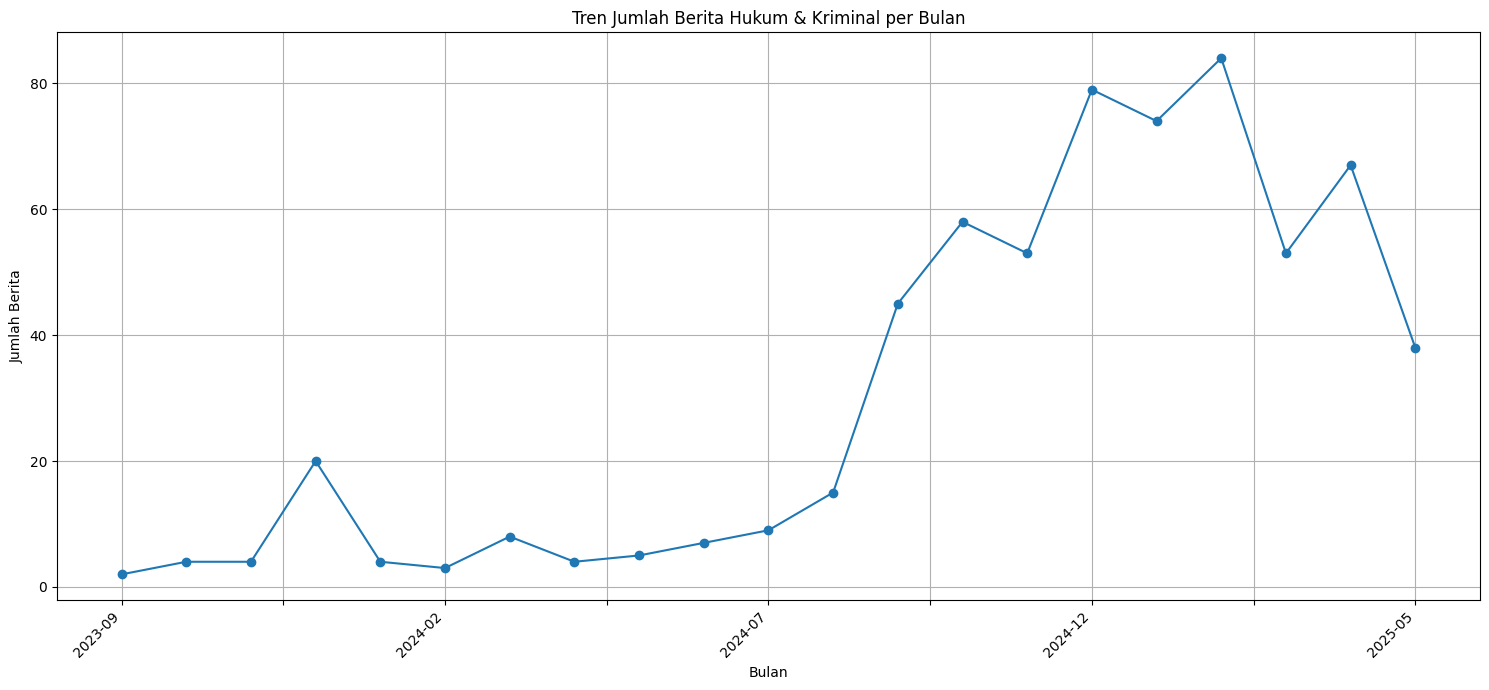


Rentang tanggal data: 2023-09-23 12:21:00 sampai 2025-05-17 10:39:00


In [14]:
if pd.api.types.is_datetime64_any_dtype(df['tanggal']):
    df_valid_dates = df.dropna(subset=['tanggal'])
    df_valid_dates['tahun_bulan'] = df_valid_dates['tanggal'].dt.to_period('M')
    berita_per_bulan = df_valid_dates['tahun_bulan'].value_counts().sort_index()
    
    berita_per_bulan.index = berita_per_bulan.index.astype(str)

    plt.figure(figsize=(15, 7))
    berita_per_bulan.plot(kind='line', marker='o')
    plt.title('Tren Jumlah Berita Hukum & Kriminal per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Berita')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nRentang tanggal data: {df['tanggal'].min()} sampai {df['tanggal'].max()}")
else:
    print("\nKolom 'tanggal' tidak valid untuk analisis tren waktu.")


## Kata Kunci yang Sering Muncul


Top 20 Kata Kunci di Judul:
warga: 52
ditembak: 34
begal: 34
anak: 29
deli: 27
serdang: 27
pemuda: 24
anggota: 23
batam: 23
juta: 22
teman: 22
geng: 22
tahun: 22
aksi: 22
tangkap: 21
polres: 21
maling: 20
sopir: 19
warung: 18
bakar: 17


C:\Users\fairuuz\AppData\Local\Temp\ipykernel_25008\3799309214.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata Kunci', data=words_df, palette='magma')


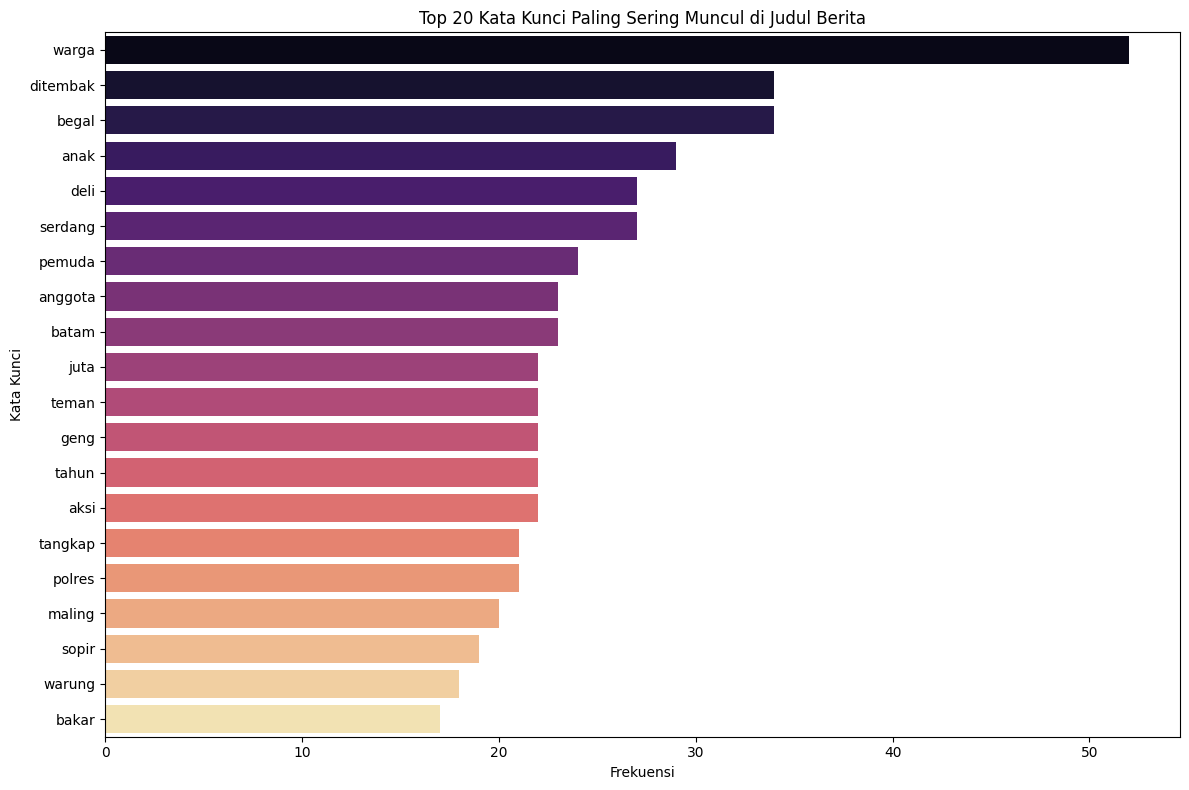

In [15]:
import re
from collections import Counter

all_headlines = ' '.join(df['judul'].dropna().astype(str).tolist())
words = re.findall(r'\b\w+\b', all_headlines.lower())

stop_words = set(
    ['di', 'dan', 'yang', 'ini', 'itu', 'dengan', 'dari', 'saat', 'seorang', 'seorang', 'hingga', 'ada',
     'karena', 'oleh', 'ke', 'tak', 'para', 'serta', 'sudah', 'hingga', 'tewas', 'polisi', 'kasus',
     'tersangka', 'pelaku', 'pria', 'wanita', 'remaja', 'juga', 'akan', 'tak', 'melakukan', 'terjadi',
     'ditemukan', 'ciduk', 'diringkus', 'ditangkap', 'gegara', 'jadi', 'jadi', 'usai', 'saat', 'atas', 'bikin',
     'sumut', 'sumbagsel', 'bali', 'jatim', 'jabar', 'sulsel', 'ntb', 'ntt', 'kalbar', 'riau', 'aceh',
     'kota', 'kabupaten', 'medan', 'surabaya', 'bandung', 'palembang', 'makassar', 'jombang', 'lampung',
     'sumatera', 'sulawesi', 'jawa', 'nusa', 'tenggara', 'barat', 'timur', 'selatan', 'utara', 'pusat',
     'detiksumut', 'detikjatim', 'detikbali', 'detiknews', 'detiksumbagsel', 'detikkalimantan', 'detikjogja',
     'korban', 'orang', 'motor', 'mobil', 'hp', 'uang', 'rumah', 'berita', 'aniaya', 'bunuh', 'tikam', 'curi',
     'rampok', 'perkosa', 'sabung', 'ayam', 'narkoba', 'miras', 'judi', 'online', 'otk', 'hingga', 'pakai', 'untuk'
     ]
)

filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

word_counts = Counter(filtered_words)
print("\nTop 20 Kata Kunci di Judul:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# Visualisasi Top 20 Kata Kunci
top_words = word_counts.most_common(20)
words_df = pd.DataFrame(top_words, columns=['Kata Kunci', 'Frekuensi'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Frekuensi', y='Kata Kunci', data=words_df, palette='magma')
plt.title('Top 20 Kata Kunci Paling Sering Muncul di Judul Berita')
plt.xlabel('Frekuensi')
plt.ylabel('Kata Kunci')
plt.tight_layout()
plt.show()

In [16]:
df
df.to_csv('../data/processed/cleaned_all_data.csv', index=False)